In [1]:
import pandas as pd
import numpy as np
import xarray as xr

In [23]:
path='../tsready_data/amphan/'
ds=xr.open_dataset(path+'mslp_amphan.nc')

In [24]:
ds.slp #

<xarray.DataArray 'slp' (time: 42, lat: 120, lon: 280)>
[1411200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-05-15T06:00:00 ... 2020-05-20T09:00:00
  * lon      (lon) float64 40.0 40.25 40.5 40.75 ... 109.0 109.2 109.5 109.8
  * lat      (lat) float64 30.0 29.75 29.5 29.25 29.0 ... 1.25 1.0 0.75 0.5 0.25
Attributes:
    table:    128

In [25]:
p=ds.slp

In [26]:
p.shape

(42, 120, 280)

In [11]:

dm=xr.open_mfdataset([path+'te200_amphan.nc',path+'te250_amphan.nc',path+'te300_amphan.nc',path+'te400_amphan.nc',
                     path+'te500_amphan.nc',path+'te600_amphan.nc',path+'te700_amphan.nc',path+'te850_amphan.nc',
                     path+'te925_amphan.nc',path+'te1000_amphan.nc'                     
                     ])

In [73]:
dm1=xr.open_mfdataset([path+'vor1000_amphan.nc',path+'vor925_amphan.nc',
                     path+'vor850_amphan.nc',path+'vor700_amphan.nc',path+'vor600_amphan.nc',path+'vor500_amphan.nc',
                     path+'vor400_amphan.nc',path+'vor300_amphan.nc'                     
                     ])

In [76]:
varname=["vor1000","vor300","vor400","vor500","vor600","vor700","vor850","vor925"]

In [77]:
dm1

<xarray.Dataset>
Dimensions:  (time: 42, lon: 280, lat: 120)
Coordinates:
  * time     (time) datetime64[ns] 2020-05-15T06:00:00 ... 2020-05-20T09:00:00
  * lon      (lon) float64 40.0 40.25 40.5 40.75 ... 109.0 109.2 109.5 109.8
  * lat      (lat) float64 30.0 29.75 29.5 29.25 29.0 ... 1.25 1.0 0.75 0.5 0.25
Data variables:
    vor1000  (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>
    vor300   (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>
    vor400   (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>
    vor500   (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>
    vor600   (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>
    vor700   (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>
    vor850   (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>
    vor925   (time, lat, lon) float32 dask.array<chunksize=(42, 120, 280), meta=np.ndarray>

In [14]:
track=pd.read_csv('../storm_tracks_nio/nio_bb_20200514.csv',delimiter=r",")

In [15]:
lon1=track['longitude'].to_numpy()
lat1=track['latitude'].to_numpy()
pos = arr = np.stack((lat1, lon1), axis=1)

In [16]:
pos

array([[ 9.51   , 87.52   ],
       [ 9.50504, 87.24   ],
       [ 9.52   , 87.03   ],
       [ 9.48499, 86.785  ],
       [ 9.52   , 86.6    ],
       [ 9.58497, 86.45   ],
       [ 9.84   , 86.44   ],
       [10.09   , 86.2134 ],
       [10.3286 , 86.0714 ],
       [10.4925 , 86.1062 ],
       [10.6    , 86.15   ],
       [10.7537 , 86.125  ],
       [10.9    , 86.1    ],
       [11.075  , 86.125  ],
       [11.2    , 86.1    ],
       [11.2962 , 86.125  ],
       [11.45   , 86.15   ],
       [11.6387 , 86.1713 ],
       [11.9    , 86.2    ],
       [12.4675 , 86.3612 ],
       [12.51   , 86.35   ],
       [12.865  , 86.4651 ],
       [13.15   , 86.35   ],
       [13.2713 , 86.235  ],
       [13.4    , 86.2    ],
       [13.71   , 86.235  ],
       [14.05   , 86.35   ],
       [14.475  , 86.45   ],
       [14.85   , 86.55   ],
       [15.1637 , 86.65   ],
       [15.55   , 86.77   ],
       [15.9963 , 86.8537 ],
       [16.51   , 86.95   ],
       [16.95   , 86.9788 ],
       [17.35 

In [17]:
tc_irad=np.empty((42,4))
tc_irad[:,0] = pos[:,0]-2
tc_irad[:,1] = pos[:,0]+2
tc_irad[:,2] = pos[:,1]-2
tc_irad[:,3] = pos[:,1]+2

In [18]:
tc_orad=np.empty((42,4))
tc_orad[:,0] = pos[:,0]-8
tc_orad[:,1] = pos[:,0]+8
tc_orad[:,2] = pos[:,1]-8
tc_orad[:,3] = pos[:,1]+8

In [19]:
tc_irad

array([[ 7.51   , 11.51   , 85.52   , 89.52   ],
       [ 7.50504, 11.50504, 85.24   , 89.24   ],
       [ 7.52   , 11.52   , 85.03   , 89.03   ],
       [ 7.48499, 11.48499, 84.785  , 88.785  ],
       [ 7.52   , 11.52   , 84.6    , 88.6    ],
       [ 7.58497, 11.58497, 84.45   , 88.45   ],
       [ 7.84   , 11.84   , 84.44   , 88.44   ],
       [ 8.09   , 12.09   , 84.2134 , 88.2134 ],
       [ 8.3286 , 12.3286 , 84.0714 , 88.0714 ],
       [ 8.4925 , 12.4925 , 84.1062 , 88.1062 ],
       [ 8.6    , 12.6    , 84.15   , 88.15   ],
       [ 8.7537 , 12.7537 , 84.125  , 88.125  ],
       [ 8.9    , 12.9    , 84.1    , 88.1    ],
       [ 9.075  , 13.075  , 84.125  , 88.125  ],
       [ 9.2    , 13.2    , 84.1    , 88.1    ],
       [ 9.2962 , 13.2962 , 84.125  , 88.125  ],
       [ 9.45   , 13.45   , 84.15   , 88.15   ],
       [ 9.6387 , 13.6387 , 84.1713 , 88.1713 ],
       [ 9.9    , 13.9    , 84.2    , 88.2    ],
       [10.4675 , 14.4675 , 84.3612 , 88.3612 ],
       [10.51   , 14

In [20]:
tc_orad

array([[ 1.51   , 17.51   , 79.52   , 95.52   ],
       [ 1.50504, 17.50504, 79.24   , 95.24   ],
       [ 1.52   , 17.52   , 79.03   , 95.03   ],
       [ 1.48499, 17.48499, 78.785  , 94.785  ],
       [ 1.52   , 17.52   , 78.6    , 94.6    ],
       [ 1.58497, 17.58497, 78.45   , 94.45   ],
       [ 1.84   , 17.84   , 78.44   , 94.44   ],
       [ 2.09   , 18.09   , 78.2134 , 94.2134 ],
       [ 2.3286 , 18.3286 , 78.0714 , 94.0714 ],
       [ 2.4925 , 18.4925 , 78.1062 , 94.1062 ],
       [ 2.6    , 18.6    , 78.15   , 94.15   ],
       [ 2.7537 , 18.7537 , 78.125  , 94.125  ],
       [ 2.9    , 18.9    , 78.1    , 94.1    ],
       [ 3.075  , 19.075  , 78.125  , 94.125  ],
       [ 3.2    , 19.2    , 78.1    , 94.1    ],
       [ 3.2962 , 19.2962 , 78.125  , 94.125  ],
       [ 3.45   , 19.45   , 78.15   , 94.15   ],
       [ 3.6387 , 19.6387 , 78.1713 , 94.1713 ],
       [ 3.9    , 19.9    , 78.2    , 94.2    ],
       [ 4.4675 , 20.4675 , 78.3612 , 94.3612 ],
       [ 4.51   , 20

In [46]:
x=ds.slp[0,:,:].sel(lat=slice(17.51,1.51),lon=slice(79.51,95.51))

In [47]:
x.lat

<xarray.DataArray 'lat' (lat: 64)>
array([17.5 , 17.25, 17.  , 16.75, 16.5 , 16.25, 16.  , 15.75, 15.5 , 15.25,
       15.  , 14.75, 14.5 , 14.25, 14.  , 13.75, 13.5 , 13.25, 13.  , 12.75,
       12.5 , 12.25, 12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 , 10.25,
       10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,
        7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,
        5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ,  2.75,
        2.5 ,  2.25,  2.  ,  1.75])
Coordinates:
    time     datetime64[ns] 2020-05-15T06:00:00
  * lat      (lat) float64 17.5 17.25 17.0 16.75 16.5 ... 2.75 2.5 2.25 2.0 1.75
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [48]:
x.shape

(64, 64)

In [49]:
tc_orad[0,:][2],tc_orad[0,:][3]

(79.52, 95.52)

In [57]:
lonselect = ds.lon.sel(lon=slice(tc_orad[0,:][2],tc_orad[0,:][3])).data
latselect = np.flipud(ds.lat.sel(lat=slice(tc_orad[0,:][1],tc_orad[0,:][0])).data)
lon2d,lat2d = np.meshgrid(lonselect,latselect)

In [63]:
lon2d

array([[79.75, 80.  , 80.25, ..., 95.  , 95.25, 95.5 ],
       [79.75, 80.  , 80.25, ..., 95.  , 95.25, 95.5 ],
       [79.75, 80.  , 80.25, ..., 95.  , 95.25, 95.5 ],
       ...,
       [79.75, 80.  , 80.25, ..., 95.  , 95.25, 95.5 ],
       [79.75, 80.  , 80.25, ..., 95.  , 95.25, 95.5 ],
       [79.75, 80.  , 80.25, ..., 95.  , 95.25, 95.5 ]])

In [64]:
tc_irad[0]

array([ 7.51, 11.51, 85.52, 89.52])

In [60]:
x[-10].shape

(64,)

In [65]:
def createmask(irad=None):
    mask = []
    for ti in range(len(tc_irad)):
        lonselect = ds.lon.sel(lon=slice(tc_orad[ti,:][2],tc_orad[ti,:][3])).data
        latselect = np.flipud(ds.lat.sel(lat=slice(tc_orad[ti,:][1],tc_orad[ti,:][0])).data)
        lon2d,lat2d = np.meshgrid(lonselect,latselect)
        #############################################################################################
        latcriteria = np.logical_and(lat2d>tc_irad[ti][0],lat2d<tc_irad[ti][1])
        loncriteria = np.logical_and(lon2d>tc_irad[ti][2],lon2d<tc_irad[ti][3])
        allcriteria = np.logical_and(loncriteria,latcriteria)
        mask.append(allcriteria)
    return mask
mymask = createmask(irad=tc_irad)

In [54]:
[dtest[i].shape for i in range(42)]

[(64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64)]

In [66]:
[mymask[i].shape for i in range(42)]

[(64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64)]

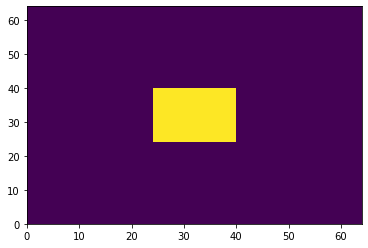

In [67]:
import matplotlib.pyplot as plt
plt.pcolormesh(mymask[0])

In [68]:
largedtest = [dtest[i,...][~mymask[i]] for i in range(len(mymask))] #here we need to apply the loop

In [69]:
len(largedtest[7]),64*64

(3840, 4096)

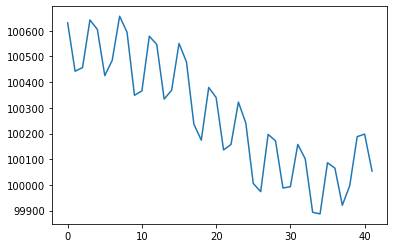

In [70]:
plt.plot([np.nanmean(obj) for obj in largedtest])
plt.show()

In [71]:
dtest=np.zeros((42,64,64))

In [72]:
ds.slp.shape

(42, 120, 280)

In [43]:
test = [] #stop where the lat start decreasing stop the time series there..lat 
#dtest=np.zeros((x.shape(0),x.shape(1),x.shape(2)))
for it in range(tc_orad.shape[0]):
    latn, lats, lone, lonw = tc_orad[it,:]
    #test.append(dm.slp[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw)))
    dtest[it,:,:]=ds.slp[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64][0:64]
    
    print(ds.slp[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:64][0:64].shape)

(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


In [78]:
dff={}
for v in varname:
    dff[v]=np.zeros((tc_irad.shape[0],))

In [79]:
dff

{'vor1000': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 'vor300': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 'vor400': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 'vor500': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 'vor600': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0

In [95]:
dm1['vor1000']

<xarray.DataArray 'vor1000' (time: 42, lat: 120, lon: 280)>
dask.array<open_dataset-b102183b768b08fe825e8ef29167b402vor1000, shape=(42, 120, 280), dtype=float32, chunksize=(42, 120, 280), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-05-15T06:00:00 ... 2020-05-20T09:00:00
  * lon      (lon) float64 40.0 40.25 40.5 40.75 ... 109.0 109.2 109.5 109.8
  * lat      (lat) float64 30.0 29.75 29.5 29.25 29.0 ... 1.25 1.0 0.75 0.5 0.25
Attributes:
    table:        128
    coordinates:  plev

In [98]:
for it in range(tc_orad.shape[0]):
    latn, lats, lone, lonw = tc_orad[it,:]
    for iv,v in enumerate(varname):
        print(v)
        dff[v][it]=dm1[v][it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw)).mean(dim=['lat','lon'])

vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vor600
vor700
vor850
vor925
vor1000
vor300
vor400
vor500
vo

In [44]:
dtest.shape

(42, 64, 64)

In [99]:
dff

{'vor1000': array([3.72620707e-06, 4.51044616e-06, 4.52504901e-06, 4.75993875e-06,
        5.26640360e-06, 5.64544462e-06, 6.40533108e-06, 7.12584006e-06,
        7.84607982e-06, 8.68054485e-06, 9.35632124e-06, 9.22808249e-06,
        9.21058381e-06, 9.04609624e-06, 8.51311052e-06, 9.24083724e-06,
        1.03159909e-05, 1.06924854e-05, 9.58896271e-06, 9.32610419e-06,
        9.87207022e-06, 1.02332342e-05, 1.07216401e-05, 1.17668824e-05,
        1.26947489e-05, 1.22675847e-05, 1.03060884e-05, 9.82244092e-06,
        8.60964792e-06, 8.70699296e-06, 8.38580308e-06, 9.62204649e-06,
        9.92591958e-06, 9.75177682e-06, 8.24715244e-06, 8.05144373e-06,
        7.92836363e-06, 7.51236803e-06, 6.82778773e-06, 7.18943193e-06,
        6.97468931e-06, 6.56663906e-06]),
 'vor300': array([ 1.82347867e-06,  9.03753971e-07,  1.51580753e-06,  2.13626481e-06,
         2.95807331e-06,  2.81345274e-06,  2.59339140e-06,  1.59801129e-06,
         1.53522706e-09, -1.12373527e-06, -3.40944098e-07, -9.662

In [64]:
dm_an = dm.where((dm["lon"] < 60) | (dm["lon"] > 80), drop=True).where((dm["lat"] < 10) | (dm["lat"] > 20), drop=True)

In [65]:
dm_an.lat

<xarray.DataArray 'lat' (lat: 79)>
array([30.  , 29.75, 29.5 , 29.25, 29.  , 28.75, 28.5 , 28.25, 28.  , 27.75,
       27.5 , 27.25, 27.  , 26.75, 26.5 , 26.25, 26.  , 25.75, 25.5 , 25.25,
       25.  , 24.75, 24.5 , 24.25, 24.  , 23.75, 23.5 , 23.25, 23.  , 22.75,
       22.5 , 22.25, 22.  , 21.75, 21.5 , 21.25, 21.  , 20.75, 20.5 , 20.25,
        9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,
        7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,  5.  ,
        4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ,  2.75,  2.5 ,
        2.25,  2.  ,  1.75,  1.5 ,  1.25,  1.  ,  0.75,  0.5 ,  0.25])
Coordinates:
  * lat      (lat) float64 30.0 29.75 29.5 29.25 29.0 ... 1.25 1.0 0.75 0.5 0.25
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

[<xarray.DataArray 'slp' (lat: 65, lon: 64)>
 array([[100663.56, 100651.81, 100645.56, ..., 100620.81, 100597.06, 100603.56],
        [100658.06, 100643.81, 100633.31, ..., 100629.31, 100609.06, 100614.06],
        [100642.31, 100630.81, 100625.31, ..., 100627.06, 100621.56, 100626.31],
        ...,
        [100781.31, 100754.56, 100740.31, ..., 100567.81, 100569.56, 100570.31],
        [100778.81, 100765.06, 100752.06, ..., 100567.06, 100570.81, 100571.81],
        [100790.56, 100781.31, 100775.56, ..., 100570.81, 100574.31, 100577.06]],
       dtype=float32)
 Coordinates:
     time     datetime64[ns] 2020-05-15T06:00:00
   * lon      (lon) float64 79.75 80.0 80.25 80.5 80.75 ... 94.75 95.0 95.25 95.5
   * lat      (lat) float64 17.5 17.25 17.0 16.75 16.5 ... 2.5 2.25 2.0 1.75 1.5
 Attributes:
     table:    128,
 <xarray.DataArray 'slp' (lat: 64, lon: 64)>
 array([[100395.5 , 100384.5 , 100363.5 , ..., 100516.5 , 100494.25, 100406.  ],
        [100379.25, 100376.25, 100366.25, ..., 1

In [173]:
testa=np.array(dtest)

In [175]:
testa

AttributeError: 'numpy.ndarray' object has no attribute 'attributes'

In [33]:
tc_irad.shape[0]

51

In [ ]:
#ds_o = ds.drop_sel(lon=slice(60,80)).drop_sel(lat=slice(10,20))

ds_o = ds.where((ds["lon"] < 60) | (ds["lon"] > 80), drop=True).where((ds["lat"] < 10) | (ds["lat"] > 20), drop=True)

In [ ]:
#ds_o = ds.drop_sel(lon=slice(60,80)).drop_sel(lat=slice(10,20))

ds_o = ds.where((ds["lon"] < 60) | (ds["lon"] > 80), drop=True).where((ds["lat"] < 10) | (ds["lat"] > 20), drop=True)

In [29]:
dt1=np.zeros((tc_irad.shape[0],))

In [30]:
dt1.shape

(51,)

In [28]:
dt1=[]
for it in range(tc_orad.shape[0]):
    latn, lats, lone, lonw = tc_irad[it,:]
    dt1[it,:,:]=dm.slp[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw))

TypeError: list indices must be integers or slices, not tuple

In [25]:
dt1

<xarray.DataArray 'slp' (lat: 0, lon: 16)>
array([], shape=(0, 16), dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-05-21T12:00:00
  * lon      (lon) float64 87.75 88.0 88.25 88.5 88.75 ... 90.75 91.0 91.25 91.5
  * lat      (lat) float64 
Attributes:
    table:    128